<a href="https://colab.research.google.com/github/VfrMark/boston_housing_mtm/blob/main/Projeto_Boston_Housing_MTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto offline de aprendizado de máquina de ponta a ponta**


---
Neste notebook será desenvolvido modelos preditivos para o setor imobiliário. Será usado um conjunto de dados do setor imobiliário de Boston.

Este projeto faz parte de uma atividade avaliativa da disciplina *MTM3587-08222 (20212) - Aprendizado da Máquina* lecionada pelo Prof. Edson.

Aluno: Marcos Rosa - 18100695


# **Problema em questão**

Nosso objetivo é: utilizando o conjunto de dados que temos, criar um modelo que consiga prever o preço de casas em Boston por meio das características disponíveis nos dados. Como temos dados rotulados, faremos a abordagem por aprendizado supervisionado.

##**Etapas do projeto:**

* Descrição do conjunto de dados;

* Separação do conjunto em treino e teste;

* Visualização do conjunto de dados (análise exploratória básica);

* Preparação do conjunto de dados;

* Comparar ao menos 3 modelos de machine learning e algumas configuração de 
hiperparâmetros, justificando a escolha do melhor modelo;

* Você deve ainda justificar a escolha da métrica utilizada;

* Deve discutir a técnica utilizada para validar o modelo e deve explicar como que o seu modelo evita o "snooping bias/data leakage";

* Fazer teste final para obter um erro aproximado.

# **Configurações iniciais**

Nesta sessão tomaremos alguns passos importantes antes de iniciar de fato a trabalhar com os dados como importar bibliotecas necessárias, fixar uma *seed* para processos pseudoaleatórios, etc...

In [ ]:
# Importações comuns
import numpy as np
import pandas as pd

#Fixar seed
seed = 42
np.random.seed(seed)

In [ ]:
# Configurações para plotar gráficos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## **Importação dos dados**

Os dados foram importados dos datasets padrão já existentes no sklearn, A celula a seguir importa os dados e coloca em um Pandas DataFrame.

In [ ]:
from sklearn.datasets import load_boston

features, label = load_boston(return_X_y = True)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df_housing = pd.DataFrame(data=features, columns = column_names)
df_housing["MEDV"] = label

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# **Entendendo os dados**

In [ ]:
# Ver a quantidade de dados e quais são as features disponíveis.
print(df_housing.shape)
print(df_housing.columns)

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
# Primeiras linhas dos dados

df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Observamos que todas as variáveis existentes são quantitativas, tanto discretas quanto contínuas e que não valores nulos em nosso dataset.

A seguir descreveremos quais são as características (features) do problema em questão:

  1.  CRIM - Taxa de crime per capita por cidade.
  2.  ZN - Proporção de terrenos residenciais zoneados para lotes com mais de 25.000ft quadrados.
  3.  INDUS - Proporção de negócios não varejistas por cidade (Medido em *acres*).
  4.  CHAS - *Charles River dummy variable* (1 se determinada extensão de terra é limitado pelo rio, 0 se não).
  5.  NOX - Concentração de oxigênio nítrico.
  6.  RM - Número médio de cômodos por casa.
  7.  AGE - proporção de unidades ocupadas pelo proprietário construídas antes de 1940.
  8.  DIS - distâncias ponderadas até cinco centros de empregos de Boston.
  9.  RAD - índice de acessibilidade a rodovias radiais.
  10. TAX - taxa de imposto sobre o valor total da propriedade por cada 10.000 dolares.
  11. PTRATIO - Número de alunos para cada professor por cidade.
  12. B - Proporção de negros por cidade.
  13. LSTAT - Porcentagem da população que tem um status baixo.
  14. MEDV - Valor médio de casas ocupadas pelo proprietário em US $1.000.

  Mais informações podem ser encontradas no [artigo](https://www.sciencedirect.com/science/article/pii/0095069678900062)

In [ ]:
# Descrição detalhada de medidas de resumo das variáveis.
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Podemos retirar informações importantes sobre os dados do dataframe anterior, como por exemplo

Para a feature RM, temos que em média o número médio de cômodos na casa é aproximadamente 6 com uma variação de 0,7.

Que 50% das casas tem o número médio de cômodos entre 5.8 e 6.6.

De um ponto de vista mais teórico, como a média e mediana tem valores bem próximos, 6.28 e 6.20 respectivamente, isso é um bom indicador de que a distribuição probabilística dessa variável seja gaussiana. Podemos observar melhor esse fator vendo os gráficos mais adiante.

Informações semelhantes podem ser retiradas das outras features assim como foi descrito para RM.



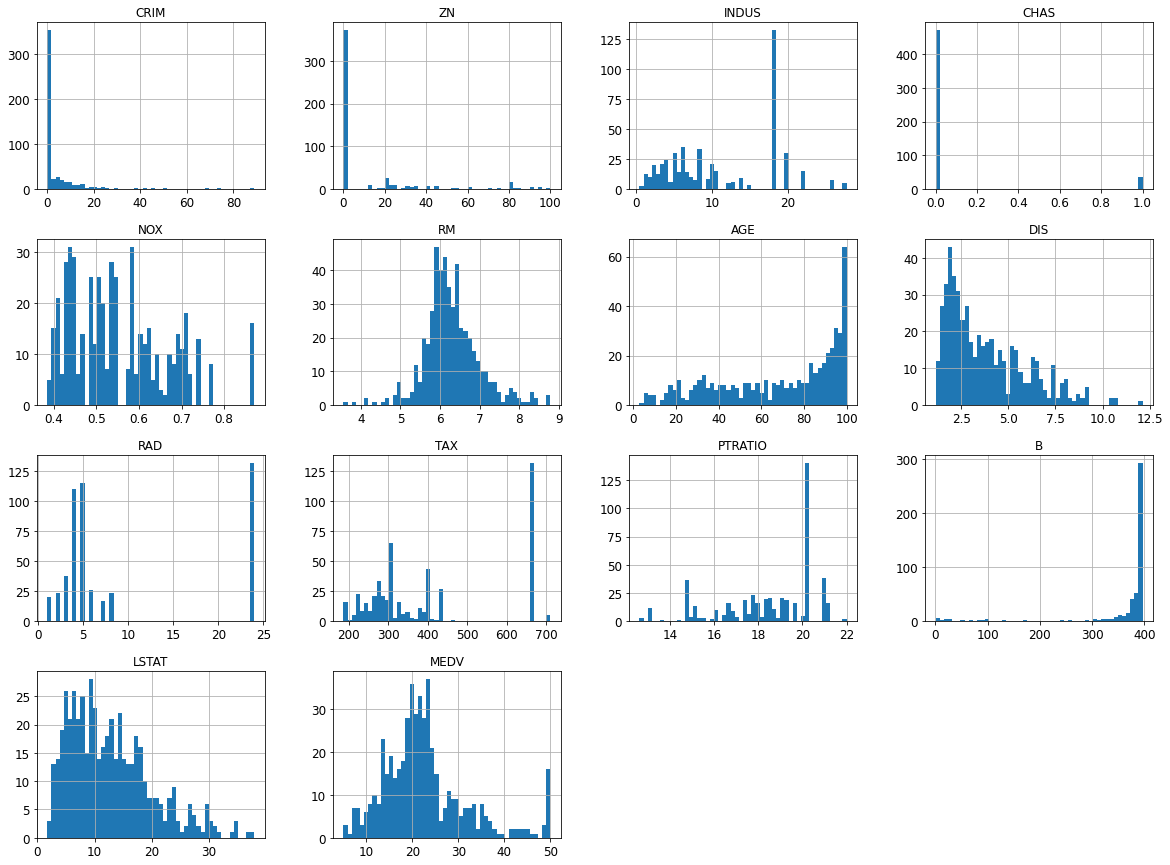

In [ ]:
#Plotar os histogramas das features

df_housing.hist(bins=50, figsize=(20,15))
plt.show()

Podemos observar um pouco melhor agora que a feature RM realmente tende para uma distribuição gaussiana. E ainda, podemos observar que variável MEDV também tende para distribuição gaussiana.

#Separando o conjunto de dados

Observou-se características iniciais e mais básicas dos dados, agora para realizar uma estimativa não envieasa do modelo final é importante separar um conjunto de treinamento e teste.

Utilizaremos uma abordagem por amostragem aleatória.

É possível que ao conversar com um estatistico outro tipo de amostragem seja mais indicada. No entanto no presente momento utilizaremos esse processo totalmente aleatório e no futuro o processo pode ser melhorado e o modelo otimizado.

In [ ]:
#Separação dos dados em treino/teste

from sklearn.model_selection import train_test_split

train_housing, test_housing = train_test_split(df_housing, test_size=0.2, random_state=seed)

# **Visualização da estrutura dos dados**

In [ ]:
# Cópia do conujnto de treino

housing = train_housing.copy()

In [ ]:
corr_matrix = housing.corr() #Matriz de correlação
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,-0.356858,0.414142,-0.380091
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,0.178652,-0.396572,0.309504
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,-0.363151,0.603644,-0.470546
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,0.041666,-0.070652,0.190642
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,-0.368034,0.593862,-0.415768
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,0.113347,-0.612577,0.710680
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,-0.265186,0.571051,-0.340216
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,0.291122,-0.494921,0.235114
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,-0.439387,0.480301,-0.387467
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,-0.442027,0.530632,-0.459795


Como a feature alvo para predição é MEDV, vejamos quais as correlações com essa variável.

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)  #Correlação de MEDV em ordem decrescente

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

Observa-se que a feature RM tem uma alta correlação com a feature MEDV que queremos prever, isto pode ser visto também nos gráficos a seguir.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3c10b2590>,
      dtype=object)

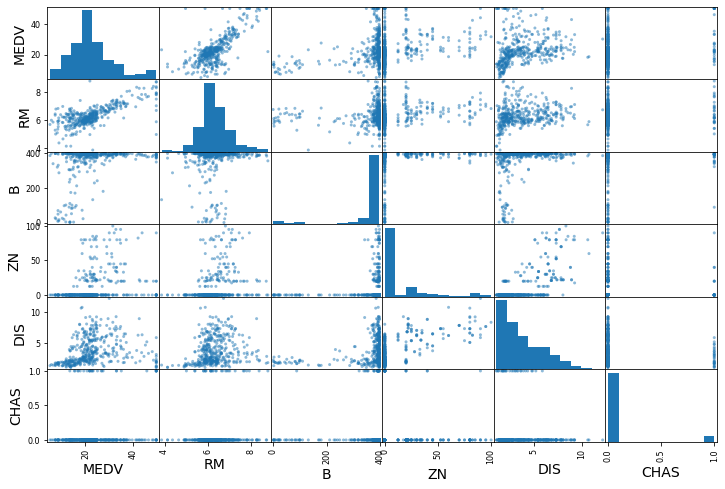

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['MEDV', 'RM', 'B', 'ZN', 'DIS', 'CHAS']
scatter_matrix(housing[attributes], figsize=(12, 8)) #plotar a matriz de correlação

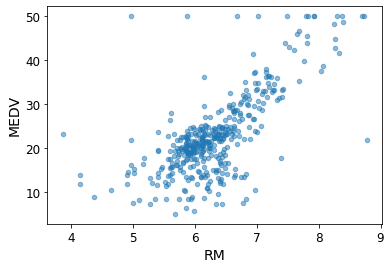

In [ ]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

Apesar de não possuir um número grande de dados no nosso conjunto já é possível observar uma correlação forte entre essas caracteristicas e ainda um possível valor limitante de 50000 para o valor médio das casas.

# Preparando os dados para os algoritmos de ML

Primeiro passo é separar as features e os rótulos

In [ ]:
housing_features = train_housing.drop('MEDV', axis=1) #Salvando copia apenas das features
housing_labels = train_housing['MEDV'].copy() #Salvando copia apenas das labels

Vejamos novamente se há dados faltantes no conjunto de dados.

In [ ]:
null_rows = housing_features[housing_features.isnull().any(axis=1)]
null_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


Aparentemente, no conjunto de treino não há dados faltantes, mas não podemos garantir que o mesmo acontecerá para o conjunto de teste. Por isso é importante ainda assim utilizar uma técnica para lidar com dados faltantes.

Faremos isso utilizando o SimpleImputer que irá substituir os dados faltantes pela mediana. 

Utilizaremos a mediana por ser mais robusta na presença de outliers do que a média, por exemplo.

##Criando Pipeline

In [ ]:
# Importações necessárias para construir a pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Pipeline que será usada para tratar os dados

pipeline = Pipeline([
             ('imputer', SimpleImputer(strategy='median')),
             ('scaler', StandardScaler())
             ])

In [ ]:
# Passando os dados pelo pipeline

housing_prepared = pipeline.fit_transform(housing_features)

#visualização de como os dados ficaram após passar pela pipeline.

df_prepared = pd.DataFrame(data=housing_prepared, columns = housing_features.columns)
df_prepared.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


# Testando diferentes modelos


Tendo agora os dados transformados podemos treinar e avaliar diferentes modelos.

É importante saber que problema estamos resolvendo, se classificação/regressão, pois o tipo de problema implicará em qual tipo de modelo iremos utilizar.

Como neste dataset as labels disponíveis e o que queremos prever são valores em um intervalo real, temos um problema de regressão, por isso utilizaremos utilizaremos modelos próprios para esse tipo de problema de regressão. Modelos comuns para essa abordagem são Linear and Polynomial Regression, Decision Tree, Random Forest, Support Vector Regression, etc...

## Cross Validation e métricas de qualidade do modelo


Aprender os parâmetros de uma função de predição e testar nos mesmos dados é um erro metodológico. Por essa razão antes de começarmos a avaliar mais detalhadamente a estrutura dos dados e tratálos devidamente, separamos o conjunto de dados em treino e teste e trabalhamos apenas com o conjunto de treino até aqui, e deixaremos o conjunto de teste apenas para a avaliação final do modelo. 

Todo tipo informação que será aprendida pelos modelos á seguir decorrem apenas do conjunto de treino. Esse processo é importante para que evitemos o Snooping Bias/Data Leakage e assim podemos ter uma perspectiva real do grau de generalização do nosso modelo final.


E ainda buscando evitar o sobreajuste do modelo ao dados no conjunto de treino, para que tenhamos um modelo que generalize bem para dados novos iremos utilizar o Cross Validation, que consiste em separar o conjunto de treino em _K_ partes, treinar o modelo em _K-1_, e usar a última parte que sobrou como validação. E repetir esse processo até que cada uma das _K_ partes sejam utilizadas como conjunto de validação.

Vejamos as métricas que utilizaremos para avaliar a qualidade dos nossos modelos.

Mean Squared Error (MSE): é uma das metricas mais utilizadas para regressão linear, e é largamente usada como _cost function_ nas implementações para solução de problemas de regressão, e é a que utilizaremos em nossos modelos.

Root Mean Squared Error (RMSE): única diferença do RMSE para MSE é que é aplicada a raiz quadrado. Isso ajuda a termor um erro mais alinhado com a magnitude da feature alvo. Diferente do MSE que nos retorna valores altos pelo potência quadrática.

Mean Absolute Error (MAE): A principal diferença entre o MSE e o MAE é a transformação que aplicamos à diferença entre os valores previstos e reais do alvo. Enquanto no MSE aplica a função quadrada, no MAE aplica-se o valor absoluto. MAE tem vantagens em termo de explicabilidade e relação com o 'Mundo real'.



In [ ]:
#Importando o cross validation.
from sklearn.model_selection import cross_val_score

#Função para calcular a média e desvio padrão dos resultados do cross validation
def metrics_scores(score):
    print(f'Score de cada iteração: {score}')
    print(f'Média: {score.mean()}')
    print(f'Desvio padrão: {score.std()}')

## Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(random_state=seed) #Instância do modelo

In [ ]:
sgd_score = cross_val_score(sgd_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-sgd_score)

Score de cada iteração: [17.57135066 34.92791682 24.34922162 20.07755689 23.05343319]
Média: 23.995895838181134
Desvio padrão: 5.952315828645457


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state = seed)

In [ ]:
tree_score = cross_val_score(tree_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-tree_score)

Score de cada iteração: [23.55037037 36.40345679 25.65851852 40.59185185 18.554625  ]
Média: 28.95176450617284
Desvio padrão: 8.235780339057477


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state = seed)

In [ ]:
forest_score = cross_val_score(forest_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-forest_score)

Score de cada iteração: [12.93749694 22.88271477 14.48113105 10.33475811 13.62199124]
Média: 14.8516184203395
Desvio padrão: 4.247673257353308


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

In [ ]:
knn_score = cross_val_score(knn_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-knn_score)

Score de cada iteração: [15.79519012 33.1204642  21.24209383 25.34774321 17.791035  ]
Média: 22.65930527160494
Desvio padrão: 6.156105345169322


## Support Vector Machines

In [ ]:
from sklearn.svm import SVR, NuSVR, LinearSVR

svr_model = SVR()
nu_svr_model = NuSVR()
lin_svr_model = LinearSVR()

In [ ]:
svr_score = cross_val_score(svr_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-svr_score)

Score de cada iteração: [26.03579636 39.61659168 38.2396779  32.19280936 25.70582526]
Média: 32.3581401119639
Desvio padrão: 5.857136904171669


In [ ]:
nu_svr_score = cross_val_score(nu_svr_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-nu_svr_score)

Score de cada iteração: [26.8752263  41.57153618 39.43118005 33.80387489 27.34544896]
Média: 33.80545327704584
Desvio padrão: 6.028607625589532


In [ ]:
lin_svr_score = cross_val_score(lin_svr_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error')
metrics_scores(-lin_svr_score)

Score de cada iteração: [18.23890378 37.77129267 32.72844352 21.03667198 25.23364478]
Média: 27.00179134781438
Desvio padrão: 7.270129207704747


# Selecionando o modelo e ajustando hiperparâmetros

Após treinar diversos modelos vemos que o que melhor performou foi o Random Forest Regressor. Agora vamos utilizar um processo de Randomized Search para encontrar os melhores hiperparâmetros para a abordagem que estamos utilizando.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Hiperparâmetros para serem treinados
random_search = {'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
                 'criterion' : ['squared_error', 'absolute_error', 'poisson'],
                 'bootstrap': [True, False],
                 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4, 6],
                 'min_samples_split': [2, 5, 10],
                 }

forest_reg = RandomForestRegressor(random_state = seed)
randomized_search = RandomizedSearchCV(forest_reg, random_search, random_state=seed, scoring='neg_mean_squared_error')

In [ ]:
randomized_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg

# Modelo e teste final

Assim o modelo final com os melhores hiperparâmetros encontrados é:

In [ ]:
final_model = randomized_search.best_estimator_
final_model

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      min_samples_leaf=2, n_estimators=400, random_state=42)

In [ ]:
randomized_search.best_params_

{'bootstrap': True,
 'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

####Por fim, vejamos quão bem esse modelo generaliza avaliando-o no conjunto de teste com dados totalmente novos para o modelo.

In [ ]:
#Separando features e label do conjunto de teste
x_test = test_housing.drop('MEDV', axis=1)
y_test = test_housing['MEDV'].copy()

In [ ]:
#Passando as features do teste pela pipeline
x_test_prepared = pipeline.transform(x_test)

In [ ]:
#Avaliando com as métricas citadas anteriormente

from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

test_prediction = final_model.predict(x_test_prepared)

final_mse = MSE(y_test, test_prediction)
final_rmse = np.sqrt(final_mse)
final_mae = MAE(y_test, test_prediction)

In [ ]:
print(final_mse)
print(final_rmse)
print(final_mae)

11.509091353400787
3.3925051736734004
2.111800245098042
